In [1]:
import json

# Load the data from the JSON file
with open('sampled_200.json', 'r') as file:
    fixed_sampled_stories = json.load(file)

In [2]:
# Explore the Data
print("Total number of stories:", len(fixed_sampled_stories))
print("Sample story:", fixed_sampled_stories[0])

Total number of stories: 200
Sample story: {'file_name': 'Files201_300.pdf', 'header': "EU's world-leading AI rules face key moment", 'media': 'The Baltimore Sun', 'time': 'December 5, 2023', 'section': 'MAIN; A; Pg. 10', 'story_text': "Length: 318 words\nByline: Kelvin Chan Associated Press\nBody\nLONDON - Hailed as a world first, European Union artificial intelligence rules are facing a make-or-break moment \nas negotiators try to hammer out the final details this week - talks complicated by the sudden rise of generative AI \nthat produces human-like work.\nFirst suggested in 2019, the EU's AI Act was expected to be the world's first comprehensive AI regulations, further \ncementing the 27-nation bloc's position as a global trendsetter when it comes to reining in the tech industry.\nBut the process has been bogged down by a last-minute battle over how to govern systems that underpin general \npurpose AI services like OpenAI's ChatGPT and Google's Bard chatbot. \nMeanwhile, the U.S., 

In [1]:
import json
import pandas as pd

# Load the preprocessed sample stories
with open ('tokenized_300.json', 'r') as file:
    preproccessed_stories = json.load(file)
    
# Convert to DataFrame for convenience
df = pd.DataFrame(preproccessed_stories)

print(df.head())

                                                   0
0  amazon offer fulfilment infrastructure seller ...
1  new york time suing openai copyright breach ne...
2  openai completes deal value company billion ne...
3  clock gen economic time edition august tuesday...
4  real solution reduce plastic pollution new yor...


##### Extract Entities from Text

In [2]:
import json
import pandas as pd
import spacy

# Load the spaCy NER model
nlp = spacy.load('en_core_web_sm')

# Function to extract entities from text using spaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Load the tokenized data
input_file_path = 'tokenized_300.json'  # Replace with your actual file path
with open(input_file_path, 'r') as file:
    tokenized_data = json.load(file)

# Convert the tokenized data to a DataFrame
df = pd.DataFrame(tokenized_data, columns=['text'])

# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Print the first 10 rows of the DataFrame
print(df.head(10))


                                                text  \
0  amazon offer fulfilment infrastructure seller ...   
1  new york time suing openai copyright breach ne...   
2  openai completes deal value company billion ne...   
3  clock gen economic time edition august tuesday...   
4  real solution reduce plastic pollution new yor...   
5  pressed biden big tech agrees rule new york ti...   
6  race microsoft google choose speed caution new...   
7  openai chief scientist leaving company new yor...   
8  professor use oral exam foil ai cheat wall str...   
9  sharp company leverage data build healthcare l...   

                                            entities  
0  [(amazon offer fulfilment infrastructure, ORG)...  
1  [(new york, GPE), (december, DATE), (gannett m...  
2  [(billion, CARDINAL), (new york, GPE), (februa...  
3  [(august, DATE), (tuesday, DATE), (mumbai, GPE...  
4  [(new york, GPE), (june tuesday, DATE), (new y...  
5  [(new york, GPE), (july saturday, DATE), (new ... 

In [3]:
# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Check the extracted entities
print("Sample of 'entities' column:")
print(df['entities'].head())

# Verify that entities are extracted correctly
for i, row in df.iterrows():
    print(f"Story {i}:")
    print(row['entities'])
    print()

Sample of 'entities' column:
0    [(amazon offer fulfilment infrastructure, ORG)...
1    [(new york, GPE), (december, DATE), (gannett m...
2    [(billion, CARDINAL), (new york, GPE), (februa...
3    [(august, DATE), (tuesday, DATE), (mumbai, GPE...
4    [(new york, GPE), (june tuesday, DATE), (new y...
Name: entities, dtype: object
Story 0:
[('amazon offer fulfilment infrastructure', 'ORG'), ('september', 'DATE'), ('friday', 'DATE'), ('bennett', 'PERSON'), ('thursday', 'DATE'), ('amazon smbhav summit national capital', 'ORG'), ('india', 'GPE'), ('forward russell', 'PERSON'), ('india', 'GPE'), ('indian', 'NORP'), ('new york', 'GPE'), ('billion', 'CARDINAL'), ('india', 'GPE'), ('indian', 'NORP'), ('billion', 'CARDINAL'), ('indian', 'NORP'), ('india', 'GPE'), ('next ten year', 'DATE'), ('india', 'GPE'), ('august', 'DATE')]

Story 1:
[('new york', 'GPE'), ('december', 'DATE'), ('gannett medium corp right', 'ORG'), ('james powel usa', 'PERSON'), ('new york', 'GPE'), ('microsoft', 'ORG'), ('

In [4]:
# Filter entities based on selected types
selected_entity_types = ['ORG', 'PERSON', 'GPE']

def filter_entities(entities, selected_types):
    # Ensure entities is a list of tuples
    if not isinstance(entities, list):
        return []
    return [entity[0] for entity in entities if isinstance(entity, tuple) and len(entity) == 2 and entity[1] in selected_types]

# Apply filtering to extract selected entities
df['selected_entities'] = df['entities'].apply(lambda x: filter_entities(x, selected_entity_types))

# Check the filtered entities
print("Sample of 'selected_entities' column:")
print(df['selected_entities'].head())

# Verify that filtering works correctly
for i, row in df.iterrows():
    print(f"Story {i} selected entities:")
    print(row['selected_entities'])
    print()

Sample of 'selected_entities' column:
0    [amazon offer fulfilment infrastructure, benne...
1    [new york, gannett medium corp right, james po...
2    [new york, new york, tripp mickle, san francis...
3                           [mumbai, bengaluru, kumar]
4    [new york, new york, california canada chile, ...
Name: selected_entities, dtype: object
Story 0 selected entities:
['amazon offer fulfilment infrastructure', 'bennett', 'amazon smbhav summit national capital', 'india', 'forward russell', 'india', 'new york', 'india', 'india', 'india']

Story 1 selected entities:
['new york', 'gannett medium corp right', 'james powel usa', 'new york', 'microsoft', 'manhattan', 'microsoft', 'sam altman', 'sarah siverman', 'jonathan franzen george martin', 'new york', 'new york']

Story 2 selected entities:
['new york', 'new york', 'tripp mickle', 'san francisco', 'san francisco', 'new york', 'sam altman', 'wilmerhale', 'andreessen horowitz', 'microsoft', 'google researcher', 'google', 'sam altma

Sample of flattened selected entities list:
['amazon offer fulfilment infrastructure', 'bennett', 'amazon smbhav summit national capital', 'india', 'forward russell', 'india', 'new york', 'india', 'india', 'india', 'new york', 'gannett medium corp right', 'james powel usa', 'new york', 'microsoft', 'manhattan', 'microsoft', 'sam altman', 'sarah siverman', 'jonathan franzen george martin']
Entity frequencies:
new york         534
microsoft        415
india            300
google           176
china            105
san francisco     72
washington        62
united state      54
sam altman        52
california        47
congress          41
intel             40
america           34
white house       33
fed               33
los angeles       32
taiwan            30
japan             28
russia            27
pittsburgh        26
Name: count, dtype: int64


/var/folders/15/flznp7b90sd75nfgk99v3l3w0000gn/T/ipykernel_80542/4165666088.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')


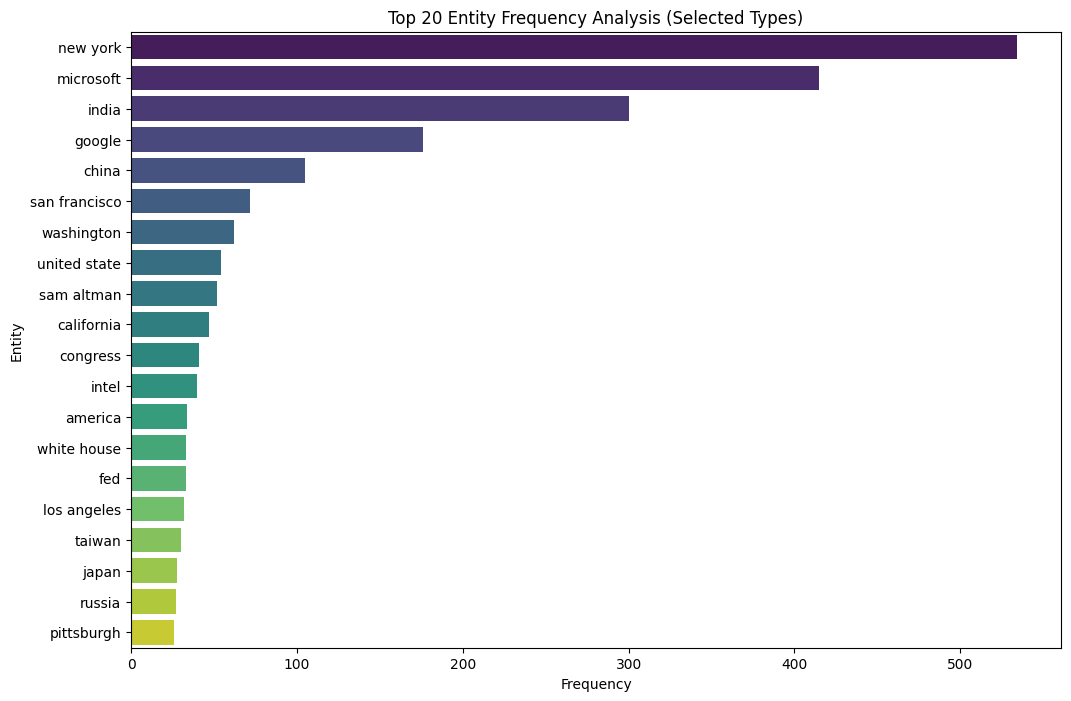

In [6]:
# Flatten the list of selected entities to calculate frequencies
all_selected_entities = [entity for sublist in df['selected_entities'] for entity in sublist]

# Check the flattened list of selected entities
print("Sample of flattened selected entities list:")
print(all_selected_entities[:20])

# Calculate frequency of selected entities
entity_freq = pd.Series(all_selected_entities).value_counts()

# Check the frequency of selected entities
print("Entity frequencies:")
print(entity_freq.head(20))

# Plot a bar chart of the top 20 entities
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.title('Top 20 Entity Frequency Analysis (Selected Types)')
plt.show()